#Importando as Bibliotecas:

In [114]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

In [115]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [116]:
df = pd.read_html(request)

In [117]:
df1 = df[0]

In [118]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.198 ETH,27.6%,NaN,964.26 ETH,"6,349.59 ETH",2647.0,0.1%,4870.0
1,2,Azuki,11.05 ETH,14.1%,NaN,"110,488.95 ETH","1,404.14 ETH",5404.0,-0.2%,9999.0
2,3,LAND,3.698 ETH,3.1%,NaN,"520,996.43 ETH","1,373.18 ETH",19620.0,2.0%,140886.0
3,4,Bored Ape Yacht Club,91.0 ETH,1.9%,NaN,"909,909.0 ETH","1,364.87 ETH",6314.0,-0.0%,9999.0
4,5,CloneX,14.7 ETH,11.6%,NaN,"276,859.8 ETH","1,122.92 ETH",8223.0,0.3%,18834.0
5,6,Mutant Ape Yacht Club,19.99 ETH,3.2%,NaN,"358,880.47 ETH",999.15 ETH,11706.0,0.1%,17953.0
6,7,Cool Pets,2.55 ETH,5.2%,NaN,"40,458.3 ETH",879.52 ETH,9604.0,-1.0%,15866.0
7,8,Doodles,13.5 ETH,-0.7%,NaN,"135,000.0 ETH",443.98 ETH,5982.0,0.1%,10000.0
8,9,MekaVerse,1.12 ETH,32.8%,NaN,"9,954.56 ETH",394.86 ETH,5054.0,-1.8%,8888.0
9,10,World of Women,9.88 ETH,-5.3%,NaN,"98,800.0 ETH",213.5 ETH,5066.0,0.0%,10000.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [119]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [120]:
dfs

[[     #                           NFT  ... 24h Owners Total Assets
  0   26                    VeeFriends  ...       0.0%      10255.0
  1   27                       Blitmap  ...       0.3%       1700.0
  2   28                   PUNKS Comic  ...       0.1%      23204.0
  3   29                  inbetweeners  ...      -0.1%      10777.0
  4   30                     CrypToadz  ...      -0.1%       7025.0
  5   31                    Lazy Lions  ...      -0.2%      10080.0
  6   32                   Phanta Bear  ...       0.4%      10000.0
  7   33                 OnChainMonkey  ...      -0.0%       9500.0
  8   34                Creature World  ...       0.0%      10000.0
  9   35                          Loot  ...      -0.1%       7779.0
  10  36                      BYO Land  ...      -0.1%      10056.0
  11  37       Revenants by Alethea AI  ...       0.0%        100.0
  12  38                X Rabbits Club  ...       0.1%       7502.0
  13  39         Neo Tokyo: Identities  ...     

In [121]:
len(dfs)

4

In [122]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [123]:
len(datasets)

4

In [124]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [125]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.198 ETH,27.6%,NaN,964.26 ETH,"6,349.59 ETH",2647.0,0.1%,4870.0
1,2,Azuki,11.05 ETH,14.1%,NaN,"110,488.95 ETH","1,404.14 ETH",5404.0,-0.2%,9999.0
2,3,LAND,3.698 ETH,3.1%,NaN,"520,996.43 ETH","1,373.18 ETH",19620.0,2.0%,140886.0
3,4,Bored Ape Yacht Club,91.0 ETH,1.9%,NaN,"909,909.0 ETH","1,364.87 ETH",6314.0,-0.0%,9999.0
4,5,CloneX,14.7 ETH,11.6%,NaN,"276,859.8 ETH","1,122.92 ETH",8223.0,0.3%,18834.0
...,...,...,...,...,...,...,...,...,...,...
120,121,COVIDPunks,0.009 ETH,-64.2%,NaN,2.74 ETH,0.03 ETH,189.0,0.0%,305.0
121,122,Bored Ape Comic,0.028 ETH,-6.6%,NaN,279.97 ETH,0.03 ETH,2708.0,0.1%,9999.0
122,123,MondrianNFT,0.01 ETH,-13.8%,NaN,40.96 ETH,0.02 ETH,1840.0,0.2%,4096.0
123,124,Spookies,0.01 ETH,3.4%,NaN,88.88 ETH,0.02 ETH,2676.0,0.0%,8888.0


###Floor Price:

In [126]:
prices = []
for price in df_final['Floor Price']:
  price = price.split()
  if price[0] == 'ETH':
    price[0] = 0
    price.append('ETH')
  
  prices.append(price[0])

In [127]:
df_final['Floor Price'] = prices

In [128]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [129]:
df_final['Market Cap']

0          964.26 ETH
1      110,488.95 ETH
2      520,996.43 ETH
3       909,909.0 ETH
4       276,859.8 ETH
            ...      
120          2.74 ETH
121        279.97 ETH
122         40.96 ETH
123         88.88 ETH
124           4.5 ETH
Name: Market Cap, Length: 125, dtype: object

In [130]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [131]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [132]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [133]:
df_final['Market Cap'] = market_caps_final

In [134]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [135]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [136]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.198,27.6%,NaN,964.26,"6,349.59 ETH",2647.0,0.1%,4870.0
1,2,Azuki,11.050,14.1%,NaN,110488.95,"1,404.14 ETH",5404.0,-0.2%,9999.0
2,3,LAND,3.698,3.1%,NaN,520996.43,"1,373.18 ETH",19620.0,2.0%,140886.0
3,4,Bored Ape Yacht Club,91.000,1.9%,NaN,909909.0,"1,364.87 ETH",6314.0,-0.0%,9999.0
4,5,CloneX,14.700,11.6%,NaN,276859.8,"1,122.92 ETH",8223.0,0.3%,18834.0


In [137]:
tfhours = []
for per in df_final['24h(%)']:
  per = per.split('%')
  tfhours.append(float(per[0]))

In [138]:
df_final['24h(%)'] = tfhours

In [139]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.198,27.6,NaN,964.26,"6,349.59 ETH",2647.0,0.1%,4870.0
1,2,Azuki,11.050,14.1,NaN,110488.95,"1,404.14 ETH",5404.0,-0.2%,9999.0
2,3,LAND,3.698,3.1,NaN,520996.43,"1,373.18 ETH",19620.0,2.0%,140886.0
3,4,Bored Ape Yacht Club,91.000,1.9,NaN,909909.0,"1,364.87 ETH",6314.0,-0.0%,9999.0
4,5,CloneX,14.700,11.6,NaN,276859.8,"1,122.92 ETH",8223.0,0.3%,18834.0


###24h Volume:

In [140]:
df_final['24h Volume']

0      6,349.59 ETH
1      1,404.14 ETH
2      1,373.18 ETH
3      1,364.87 ETH
4      1,122.92 ETH
           ...     
120        0.03 ETH
121        0.03 ETH
122        0.02 ETH
123        0.02 ETH
124         0.0 ETH
Name: 24h Volume, Length: 125, dtype: object

In [141]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [142]:
daily_volumes
    

['6349.59',
 '1404.14',
 '1373.18',
 '1364.87',
 '1122.92',
 '999.15',
 '879.52',
 '443.98',
 '394.86',
 '213.5',
 '184.55',
 '167.89',
 '164.19',
 '134.49',
 '116.01',
 '115.08',
 '110.53',
 '95.92',
 '84.01',
 '81.83',
 '80.23',
 '78.81',
 '78.46',
 '70.78',
 '68.12',
 '56.25',
 '55.58',
 '49.7',
 '48.25',
 '45.94',
 '45.68',
 '45.0',
 '41.82',
 '36.67',
 '31.81',
 '31.11',
 '30.0',
 '29.17',
 '27.97',
 '27.9',
 '24.87',
 '23.95',
 '22.17',
 '20.87',
 '20.81',
 '19.52',
 '18.91',
 '16.36',
 '15.55',
 '15.3',
 '14.01',
 '13.76',
 '12.59',
 '12.42',
 '11.84',
 '11.16',
 '10.85',
 '10.28',
 '9.56',
 '9.46',
 '8.94',
 '8.22',
 '7.9',
 '7.61',
 '7.46',
 '6.89',
 '6.74',
 '5.8',
 '4.69',
 '4.0',
 '3.57',
 '3.52',
 '3.5',
 '3.31',
 '3.24',
 '3.2',
 '2.8',
 '2.23',
 '2.19',
 '2.19',
 '1.75',
 '1.69',
 '1.68',
 '1.64',
 '1.34',
 '1.3',
 '1.19',
 '1.17',
 '1.15',
 '0.93',
 '0.92',
 '0.88',
 '0.7',
 '0.69',
 '0.67',
 '0.58',
 '0.54',
 '0.5',
 '0.48',
 '0.48',
 '0.42',
 '0.37',
 '0.35',
 '0.32',

In [143]:
df_final['24h Volume'] = daily_volumes

In [144]:
df_final['24h Volume'].astype(float)

0      6349.59
1      1404.14
2      1373.18
3      1364.87
4      1122.92
        ...   
120       0.03
121       0.03
122       0.02
123       0.02
124       0.00
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [145]:
df_final['24h Owners']

0       0.1%
1      -0.2%
2       2.0%
3      -0.0%
4       0.3%
       ...  
120     0.0%
121     0.1%
122     0.2%
123     0.0%
124     0.1%
Name: 24h Owners, Length: 125, dtype: object

In [146]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [147]:
df_final['24h Owners'] = daily_owners

In [148]:
df_final['24h Owners'].astype(float)

0      0.1
1     -0.2
2      2.0
3     -0.0
4      0.3
      ... 
120    0.0
121    0.1
122    0.2
123    0.0
124    0.1
Name: 24h Owners, Length: 125, dtype: float64

##Razão dos proprietários (Owner Ratio):

In [218]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [219]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [220]:
df_final.isnull().sum()

NFT             0
Floor Price     0
24h(%)          0
Market Cap      0
24h Volume      0
Owners          0
24h Owners      0
Total Assets    0
Owner Ratio     0
dtype: int64

In [221]:
df_final.drop(columns=["7d", "#"], inplace=True)

KeyError: ignored

In [ ]:
df_final.duplicated().sum()

In [ ]:
df = df_final

#Salvando em CSV:

In [223]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [224]:
df_test = pd.read_csv("df_final.csv")

In [225]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.198,27.6,964.26,6349.59,2647.0,0.1,4870.0,54.353183
1,Azuki,11.050,14.1,110488.95,1404.14,5404.0,-0.2,9999.0,54.045405
2,LAND,3.698,3.1,520996.43,1373.18,19620.0,2.0,140886.0,13.926153
3,Bored Ape Yacht Club,91.000,1.9,909909.00,1364.87,6314.0,-0.0,9999.0,63.146315
4,CloneX,14.700,11.6,276859.80,1122.92,8223.0,0.3,18834.0,43.660401


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [156]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [157]:
df = df_final.copy()

##Quais colunas nos interessam?

In [158]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    float64
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
dtypes: float64(4), object(4)
memory usage: 7.9+ KB


In [226]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.198,27.6,964.26,6349.59,2647.0,0.1,4870.0,54.353183
1,Azuki,11.050,14.1,110488.95,1404.14,5404.0,-0.2,9999.0,54.045405
2,LAND,3.698,3.1,520996.43,1373.18,19620.0,2.0,140886.0,13.926153
3,Bored Ape Yacht Club,91.000,1.9,909909.0,1364.87,6314.0,-0.0,9999.0,63.146315
4,CloneX,14.700,11.6,276859.8,1122.92,8223.0,0.3,18834.0,43.660401


In [227]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,COVIDPunks,0.009,-64.2,2.74,0.03,189.0,0.0,305.0,61.967213
121,Bored Ape Comic,0.028,-6.6,279.97,0.03,2708.0,0.1,9999.0,27.082708
122,MondrianNFT,0.010,-13.8,40.96,0.02,1840.0,0.2,4096.0,44.921875
123,Spookies,0.010,3.4,88.88,0.02,2676.0,0.0,8888.0,30.108011
124,Passive Apes,0.001,904.0,4.5,0.0,1239.0,0.1,4500.0,27.533333


##Análise de cada coluna:

###Floor Price:

In [162]:
df['Floor Price']

0       0.198
1      11.050
2       3.698
3      91.000
4      14.700
        ...  
120     0.009
121     0.028
122     0.010
123     0.010
124     0.001
Name: Floor Price, Length: 125, dtype: float64

In [163]:
df['Floor Price'].describe()

count    125.000000
mean       2.608534
std        8.971495
min        0.001000
25%        0.075000
50%        0.269000
75%        1.450000
max       91.000000
Name: Floor Price, dtype: float64

In [205]:
df2 = df[df['Floor Price'] < 80]

In [208]:
df2['Floor Price'].describe()

count    124.000000
mean       1.895699
std        4.136313
min        0.001000
25%        0.073750
50%        0.268400
75%        1.412500
max       25.000000
Name: Floor Price, dtype: float64

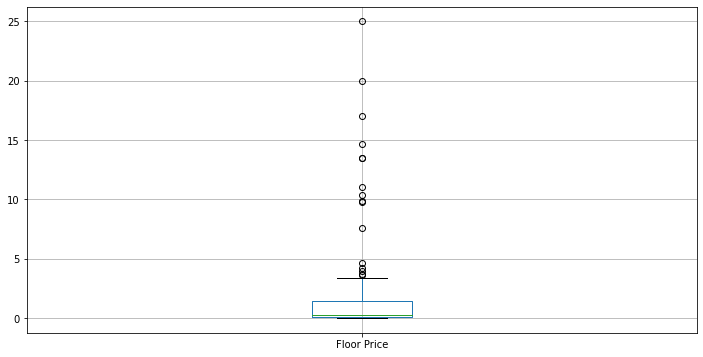

In [206]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


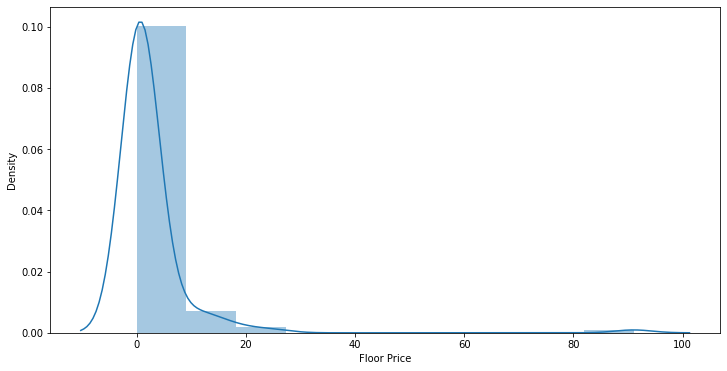

In [197]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

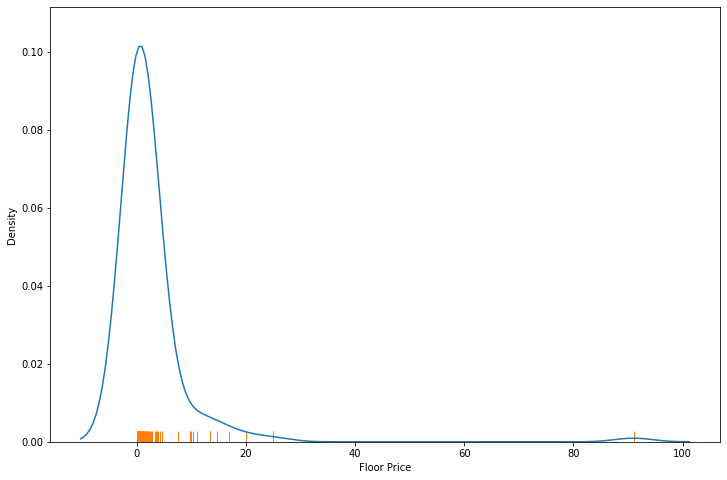

In [200]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

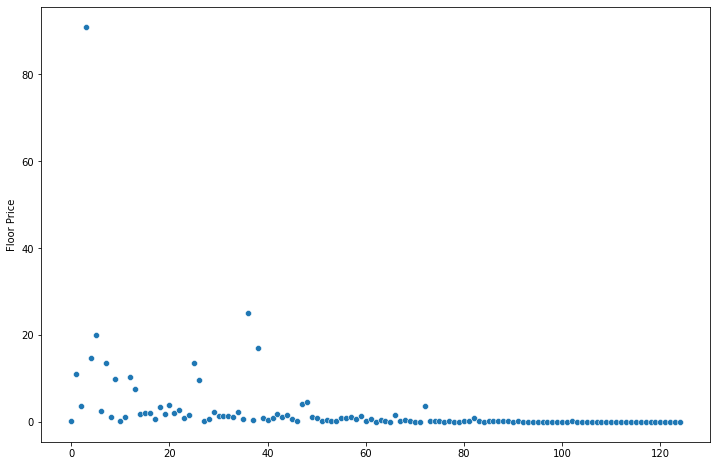

In [201]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

- As visualizações ajudam a gente perceber a distribuição concentrada entre 0 e 5 ETH. Lembrando que 1 ETH, atualmente (10/02/2022) está por volta de $3.000,00. O Floor Price é o valor mais baixo para alguém ser participante de um projeto NFT. Considerando que são os projetos mais valorizados, é natural que esses projetos tenham floor prices altos.

###

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [210]:
df['24h(%)'].describe()

count    125.000000
mean       5.849600
std       82.969429
min      -64.200000
25%       -7.600000
50%       -0.200000
75%        3.700000
max      904.000000
Name: 24h(%), dtype: float64

In [213]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
124,Passive Apes,0.001,904.0,4.5,0.0,1239.0,0.1,4500.0,27.533333


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [216]:
df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [217]:
df_mean24h.describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1.968744,56.348000,3395.48000,9328.560000,39.582017
std,3.875378,177.599181,2333.45238,6516.283105,15.032374
min,0.001000,6.400000,352.00000,1234.000000,3.520000
25%,0.089000,11.600000,1239.00000,4500.000000,34.917397
50%,0.290000,16.400000,3401.00000,8888.000000,38.460000
75%,1.200000,27.600000,4955.00000,10000.000000,49.575425
max,14.700000,904.000000,8729.00000,25455.000000,74.068071


Essas informações são bem interessantes, válida para o dia 10/02/2022:
- 25 NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- 1.96 ETH é a média do Floor Price

####Visualização de dados:

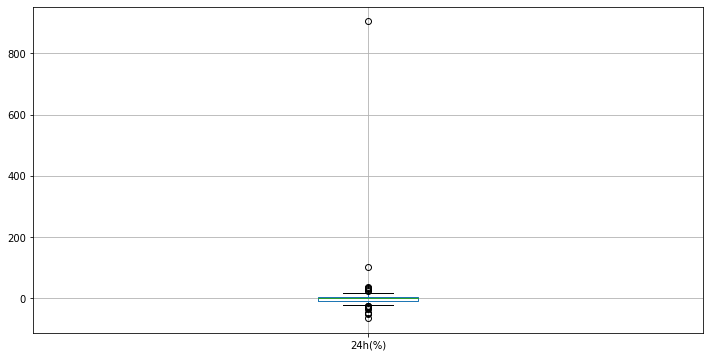

In [228]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

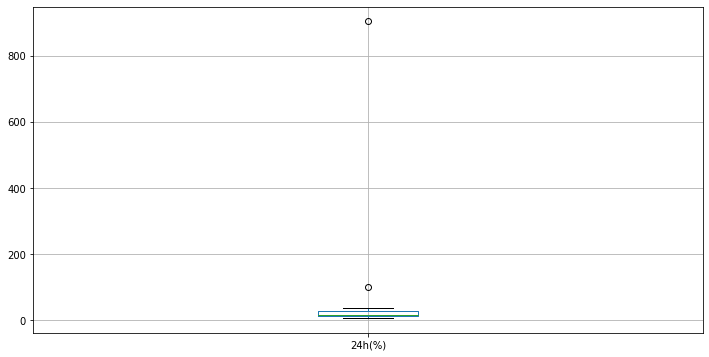

In [229]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


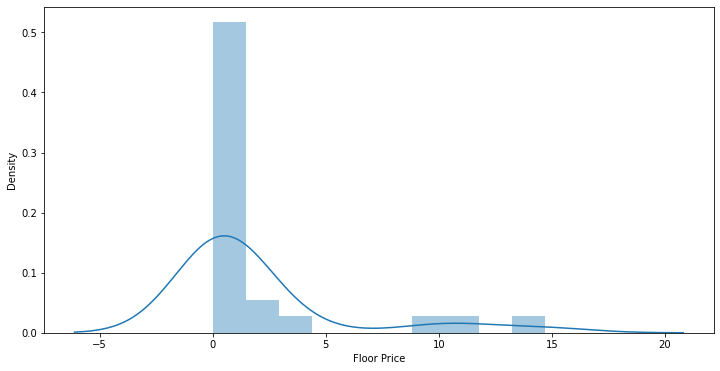

In [233]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

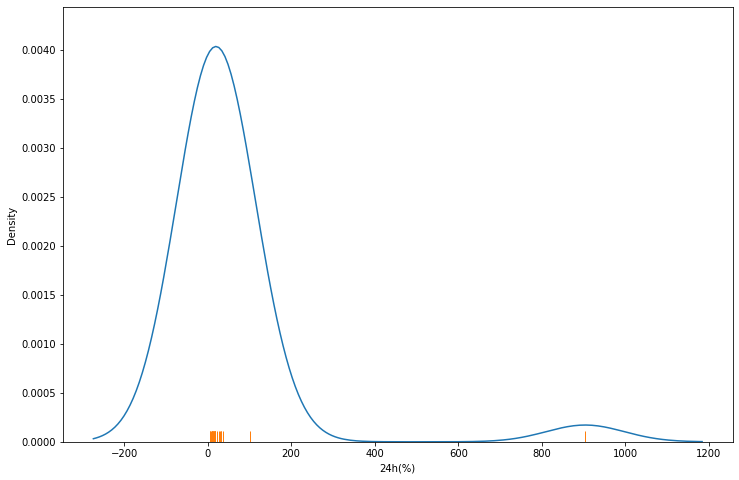

In [231]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

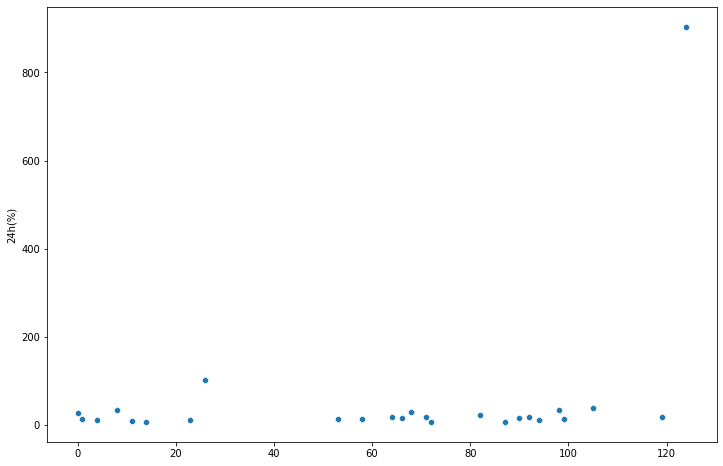

In [232]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


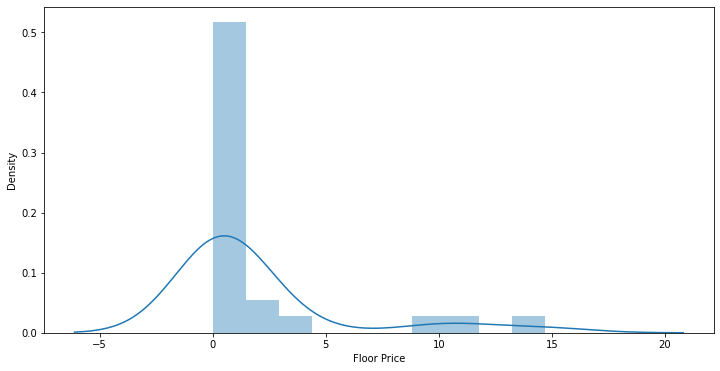

In [234]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

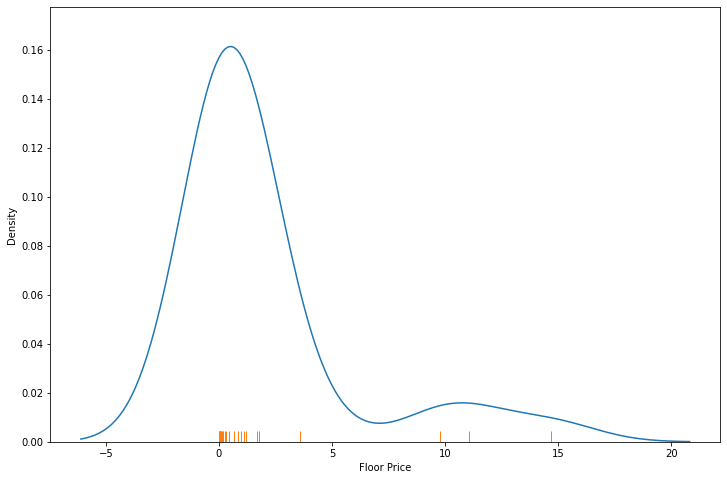

In [236]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

###Owners

###Total Assets

###Owner Ratio:

#4ºParte: Analisando as relações do início:

##As relações:
- Fazer uma coluna chamada owners_ratio (total de owners / total de ativos).
- Filtrar os owners_ratio que tenham 10% ou menos.
- Fazer uma correlação com o floor price

In [165]:
df['Owners']

0       2647.0
1       5404.0
2      19620.0
3       6314.0
4       8223.0
        ...   
120      189.0
121     2708.0
122     1840.0
123     2676.0
124     1239.0
Name: Owners, Length: 125, dtype: float64

In [166]:
df['Total Assets']

0        4870.0
1        9999.0
2      140886.0
3        9999.0
4       18834.0
         ...   
120       305.0
121      9999.0
122      4096.0
123      8888.0
124      4500.0
Name: Total Assets, Length: 125, dtype: float64

In [167]:
df['Owner Ratio'] = df['Owners'] / df ['Total Assets']

In [168]:
df['Owner Ratio'] = df['Owner Ratio']*100

In [169]:
df['Owner Ratio'].describe()

count    125.000000
mean      39.736668
std       15.667696
min        2.721425
25%       30.966193
50%       39.508290
75%       50.930000
max       77.904328
Name: Owner Ratio, dtype: float64

In [170]:
df[df['Owner Ratio'] <= 30].describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.399570,31.911111,2655.666667,16112.740741,17.600661
std,3.326736,174.569088,3672.580355,26269.828238,9.313799
min,0.001000,-21.800000,55.000000,2021.000000,2.721425
25%,0.052500,-7.100000,717.000000,8540.000000,7.842570
50%,0.172000,2.300000,1868.000000,10000.000000,18.988890
75%,1.330000,3.400000,2836.000000,10078.000000,26.646320
max,16.990000,904.000000,19620.000000,140886.000000,29.455642


In [171]:
df_sold_in = df[df['Owner Ratio'] <= 30]

In [172]:
df_sold_in

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
2,LAND,3.6980,3.1,520996.43,1373.18,19620.0,2.0,140886.0,13.926153
16,Decentral Games ICE Poker,2.0100,3.7,29211.33,110.53,3358.0,-0.3,14533.0,23.106035
17,Metroverse,0.7999,3.1,7999.0,95.92,621.0,-2.8,10000.0,6.210000
24,Crypto Unicorns,1.6800,-17.6,16800.0,68.12,519.0,-2.8,10000.0,5.190000
35,BYO Land,0.5900,-10.3,5933.04,31.11,2890.0,-0.1,10056.0,28.739061
38,Neo Tokyo: Identities,16.9900,-21.8,34336.79,27.97,55.0,0.0,2021.0,2.721425
39,loomlock NFT,0.9800,1.0,9355.08,27.9,2502.0,-0.4,9546.0,26.209931
41,Sneaky Vampire Syndicate,0.9900,2.3,8799.12,23.95,1458.0,-0.1,8888.0,16.404140
42,Forgotten Runes Wizards Cult,1.9000,-14.8,17877.1,22.17,2746.0,0.3,9409.0,29.184823
48,MetaHero,4.6500,2.3,30011.1,15.55,305.0,-1.3,6454.0,4.725751


###Fazendo relações com o floor price:

In [173]:
df_sold_in['Floor Price']

2       3.6980
16      2.0100
17      0.7999
24      1.6800
35      0.5900
38     16.9900
39      0.9800
41      0.9900
42      1.9000
48      4.6500
52      0.5450
66      1.6700
67      0.1700
74      0.2400
77      0.1720
78      0.0240
79      0.1200
80      0.1680
84      0.0700
90      0.0890
99      0.1200
100     0.0350
110     0.0200
117     0.0195
118     0.0090
121     0.0280
124     0.0010
Name: Floor Price, dtype: float64

In [ ]:
df_sold_in['Floor Price']

In [ ]:
df_sold_in['Floor Price'] = df_sold_in['Floor Price'].astype(float)

In [ ]:
df3 = df_sold_in[df_sold_in['Floor Price'] < 22]

In [ ]:
df3['Floor Price'].describe()

In [ ]:
df2 = pd.DataFrame([df3['Owner Ratio'], df3['Floor Price']])

In [ ]:
df2 = df2.transpose()

In [ ]:
df2.corr(method="pearson")